In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scripts

#### Perceptron Algorithm

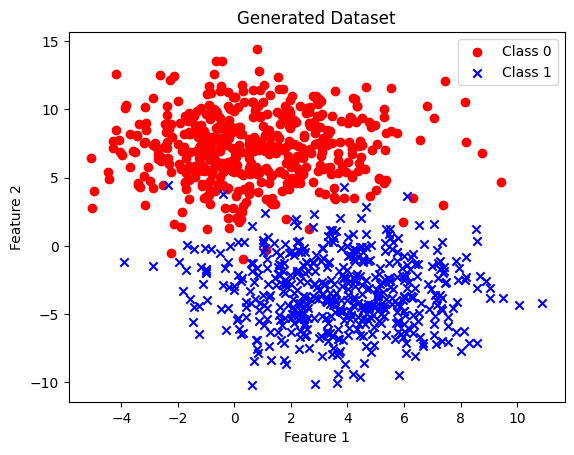

In [2]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
X, y = make_blobs(n_samples=1000, centers=2, cluster_std=2.5, random_state=67)
y = np.where(y == 0, 0, 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=54)

plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='red', marker='o', label='Class 0')
plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='blue', marker='x', label='Class 1')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper right')
plt.title('Generated Dataset')
plt.show()

In [3]:
from scripts.perceptron import PerceptronAlgorithm

In [4]:
neuron = PerceptronAlgorithm(eta=0.01, max_epochs=10, threshold=0.01)
neuron.fit(X_train, y_train)

Epoch  1  ===> error =  [0.02642857] ... 

Epoch  2  ===> error =  [0.01142857] ... 

Epoch  3  ===> error =  [0.01071429] ... 

Epoch  4  ===> error =  [0.01071429] ... 

Epoch  5  ===> error =  [0.01142857] ... 

Epoch  6  ===> error =  [0.00857143] ... 



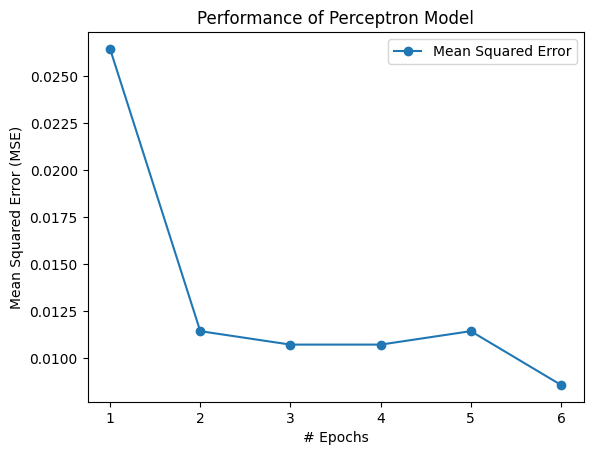

In [5]:
plt.plot(range(1, len(neuron.cost_) + 1), neuron.cost_, marker='o', label="Mean Squared Error")
plt.title("Performance of Perceptron Model")
plt.xlabel("# Epochs")
plt.ylabel("Mean Squared Error (MSE)")
plt.legend(loc="upper right")
plt.show()

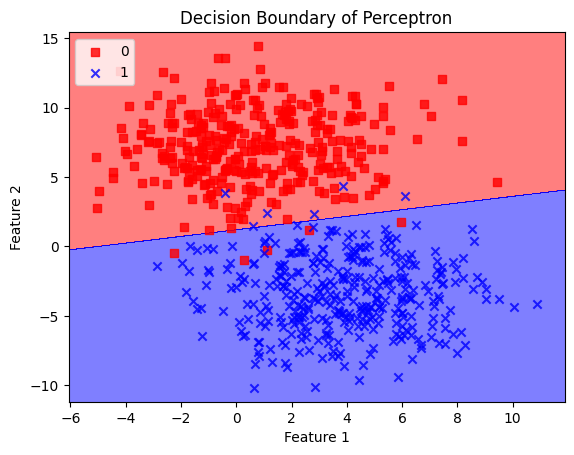

In [6]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X_train, y_train, classifier, resolution=0.01):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
    x2_min, x2_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), 
                           np.arange(x2_min, x2_max, resolution))
    
    z = np.array([classifier.predict(np.array([i, j])) for i, j in zip(xx1.ravel(), xx2.ravel())])
    z = z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, z, alpha=0.5, cmap=cmap)                                        
    plt.xlim(xx1.min(), xx1.max())                                                        
    plt.ylim(xx2.min(), xx2.max())
 
    for idx, classe in enumerate(np.unique(y)):
        plt.scatter(X_train[y_train == classe, 0], X_train[y_train == classe, 1], alpha=0.8, 
                    color=cmap(idx), marker=markers[idx], label=classe)

plot_decision_regions(X_train, y_train, neuron)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend(loc='upper left')
plt.title('Decision Boundary of Perceptron')
plt.show()

In [7]:
neuron.print_model()

Perceptron model:
y = 0.6674 + 0.0336 * x1 + -0.1397 * x2


In [8]:
classes = np.unique(y_train)
print("Avalilable classes: ", classes)

Avalilable classes:  [0 1]


In [13]:
from sklearn.metrics import confusion_matrix

y_train_pred = neuron.predict(X_train)

y_train_true = y_train.ravel()
cmprc_train = confusion_matrix(y_train_true, y_train_pred, labels=classes)

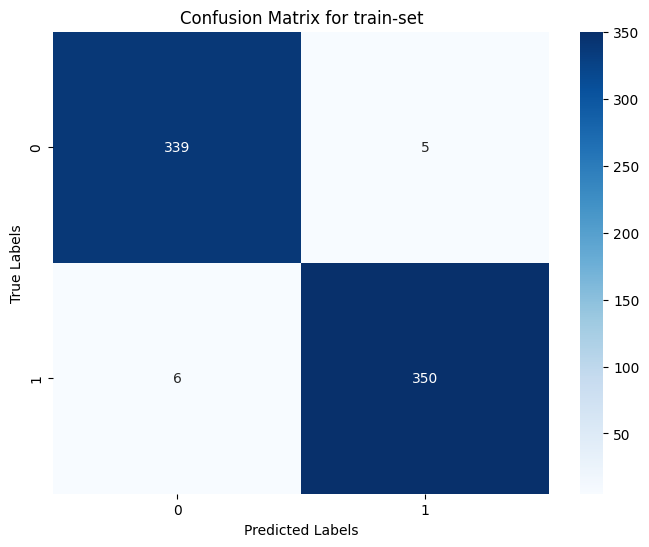

In [14]:
plt.figure(figsize=(8, 6))
sns.heatmap(cmprc_train, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix for train-set")
plt.show()

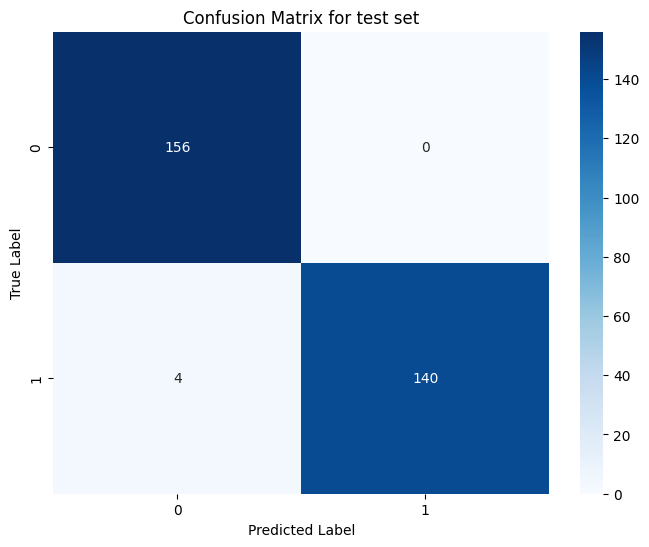

In [15]:
y_test_pred = neuron.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test set')
plt.show()

In [16]:
from sklearn.metrics import classification_report
train_report = classification_report(y_train_true, y_train_pred)
test_report = classification_report(y_test, y_test)

print("\nClassification Report (Train):\n", train_report)
print("\nClassification Report (Test):\n", test_report)


Classification Report (Train):
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       344
           1       0.99      0.98      0.98       356

    accuracy                           0.98       700
   macro avg       0.98      0.98      0.98       700
weighted avg       0.98      0.98      0.98       700


Classification Report (Test):
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       156
           1       1.00      1.00      1.00       144

    accuracy                           1.00       300
   macro avg       1.00      1.00      1.00       300
weighted avg       1.00      1.00      1.00       300



#### Multilayer Perceptron

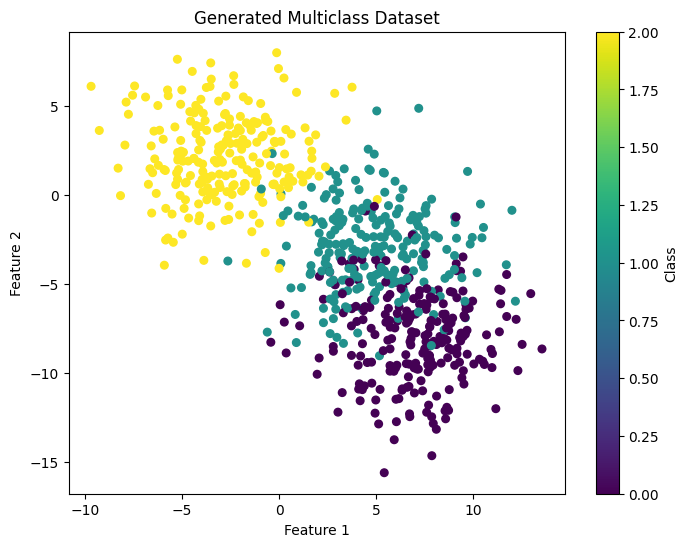

In [17]:
from scripts.mlp import MLPAlgorithm
X, y = make_blobs(n_samples=700, centers=3, cluster_std=2.5, random_state=44)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=30)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Generated Multiclass Dataset')
plt.colorbar(label='Class')
plt.show()

In [18]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

encoder = OneHotEncoder(sparse_output=False)
y_one_hot = encoder.fit_transform(y.reshape(-1, 1))
X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.3, random_state=44)

In [19]:
mlp = MLPAlgorithm(eta=0.01, threshold=0.01, max_epochs=1000)
mlp.build_architecture(input_length=2, hidden_length=5, output_length=3)
mlp.fit(X_train, y_train)

y_train_pred = mlp.test(X_train, y_train)
y_train_labels = np.argmax(y_train, axis=1)
y_train_pred_labels = np.array(y_train_pred)   

y_pred = mlp.test(X_test, y_test)
y_test_labels = np.argmax(y_test, axis=1)  
y_test_pred_labels = np.array(y_pred)   

Epoch  100 : loss =  0.09895
Epoch  200 : loss =  0.08569
Epoch  300 : loss =  0.08334
Epoch  400 : loss =  0.08232
Epoch  500 : loss =  0.08172
Epoch  600 : loss =  0.0813
Epoch  700 : loss =  0.08097
Epoch  800 : loss =  0.08071
Epoch  900 : loss =  0.08049
Epoch  1000 : loss =  0.0803


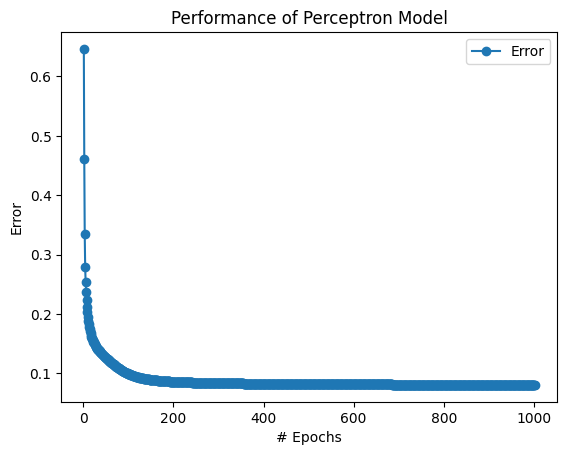

In [20]:
plt.plot(range(1, len(mlp.cost_)+1), mlp.cost_, marker='o', label="Error")
plt.title("Performance of Perceptron Model")
plt.xlabel("# Epochs")
plt.ylabel("Error")
plt.legend(loc="upper right")
plt.show()

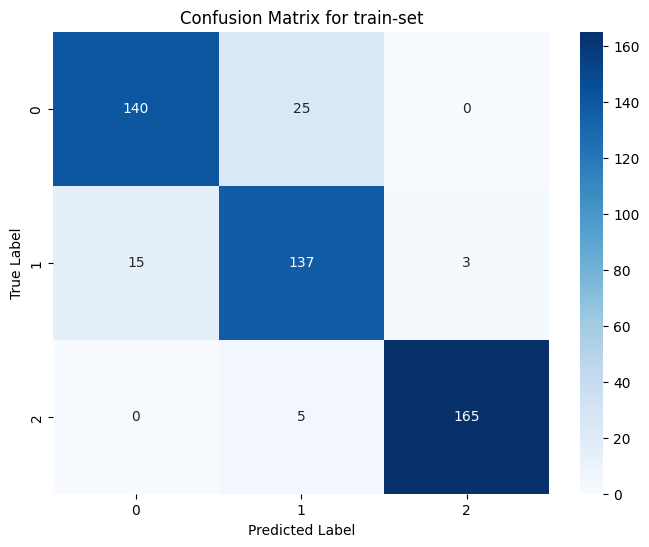

In [21]:
train_cm = confusion_matrix(y_train_labels, y_train_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(train_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_train_labels), yticklabels=np.unique(y_train_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for train-set')
plt.show()

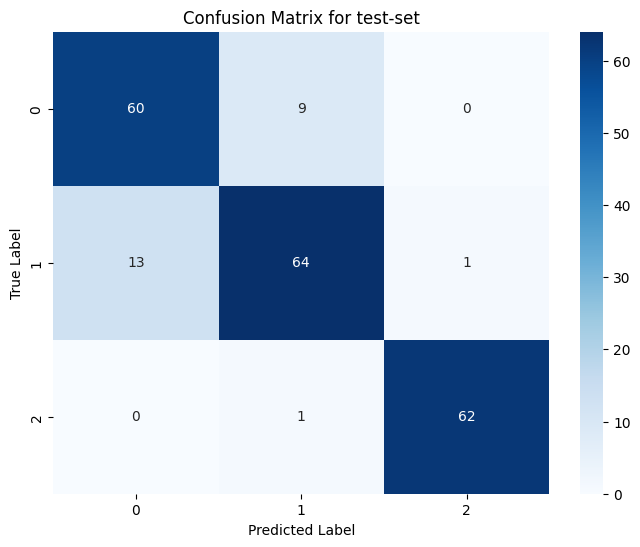

In [22]:
test_cm = confusion_matrix(y_test_labels, y_test_pred_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(test_cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test_labels), yticklabels=np.unique(y_test_labels))
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix for test-set')
plt.show()

In [23]:
train_report = classification_report(y_train_labels, y_train_pred_labels)
test_report = classification_report(y_test_labels, y_test_pred_labels)

print("\nClassification Report (Train):\n", train_report)
print("\nClassification Report (Test):\n", test_report)


Classification Report (Train):
               precision    recall  f1-score   support

           0       0.90      0.85      0.88       165
           1       0.82      0.88      0.85       155
           2       0.98      0.97      0.98       170

    accuracy                           0.90       490
   macro avg       0.90      0.90      0.90       490
weighted avg       0.90      0.90      0.90       490


Classification Report (Test):
               precision    recall  f1-score   support

           0       0.82      0.87      0.85        69
           1       0.86      0.82      0.84        78
           2       0.98      0.98      0.98        63

    accuracy                           0.89       210
   macro avg       0.89      0.89      0.89       210
weighted avg       0.89      0.89      0.89       210

